# Sprint 10. Aprenentatge Supervisat - Classificació

## Exercici 1. Crea almenys tres models de classificació diferents per intentar predir el millor possible l’endarreriment dels vols (ArrDelay) de DelayedFlights.csv. Considera si el vol ha arribat tard o no (ArrDelay > 0).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("../estructures_dataframe/DelayedFlights.csv", sep=",")

In [3]:
df = df.set_index('Unnamed: 0')

#Dropping Na
df = df.dropna()

In [4]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
6,2008,1,3,4,1937.0,1830,2037.0,1940,WN,509,N763SW,240.0,250.0,230.0,57.0,67.0,IND,LAS,1591,3.0,7.0,0,N,0,10.0,0.0,0.0,0.0,47.0
11,2008,1,3,4,1644.0,1510,1845.0,1725,WN,1333,N334SW,121.0,135.0,107.0,80.0,94.0,IND,MCO,828,6.0,8.0,0,N,0,8.0,0.0,0.0,0.0,72.0
16,2008,1,3,4,1452.0,1425,1640.0,1625,WN,675,N286WN,228.0,240.0,213.0,15.0,27.0,IND,PHX,1489,7.0,8.0,0,N,0,3.0,0.0,0.0,0.0,12.0
18,2008,1,3,4,1323.0,1255,1526.0,1510,WN,4,N674AA,123.0,135.0,110.0,16.0,28.0,IND,TPA,838,4.0,9.0,0,N,0,0.0,0.0,0.0,0.0,16.0


In [5]:
df.describe().apply(lambda s: s.apply('{0:.3f}'.format))

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1247486.000,1247486.000,1247486.000,1247486.000,1247486.000,1247486.000,1247486.000,1247486.000,1247486.000,1247486.000,1247486.000,1247486.000,1247486.000,1247486.000,1247486.000,1247486.000,1247486.000,1247486.000,1247486.000,1247486.000,1247486.000,1247486.000,1247486.000,1247486.000
mean,2008.000,6.065,15.725,3.980,1558.832,1487.949,1616.749,1652.458,2276.526,135.378,131.764,107.420,63.291,59.677,741.587,7.297,20.660,0.000,0.000,19.179,3.703,15.022,0.090,25.296
std,0.000,3.509,8.793,1.993,454.330,421.178,583.942,461.737,1997.547,72.296,69.532,68.175,60.754,59.869,559.364,6.033,16.680,0.000,0.000,43.546,21.492,33.833,2.023,42.055
min,2008.000,1.000,1.000,1.000,1.000,0.000,1.000,0.000,1.000,14.000,-21.000,0.000,15.000,6.000,11.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,2008.000,3.000,8.000,2.000,1232.000,1150.000,1326.000,1340.000,637.000,83.000,80.000,58.000,26.000,24.000,334.000,4.000,11.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,2008.000,6.000,16.000,4.000,1618.000,1529.000,1737.000,1722.000,1589.000,118.000,115.000,90.000,43.000,41.000,595.000,6.000,16.000,0.000,0.000,2.000,0.000,2.000,0.000,8.000
75%,2008.000,9.000,23.000,6.000,1924.000,1830.000,2048.000,2022.000,3676.000,167.000,161.000,136.000,79.000,75.000,972.000,8.000,24.000,0.000,0.000,21.000,0.000,15.000,0.000,33.000
max,2008.000,12.000,31.000,7.000,2400.000,2359.000,2400.000,2359.000,9741.000,1114.000,660.000,1091.000,2461.000,2467.000,4962.000,240.000,422.000,0.000,0.000,2436.000,1352.000,1357.000,392.000,1316.000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1247486 entries, 4 to 7009718
Data columns (total 29 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Year               1247486 non-null  int64  
 1   Month              1247486 non-null  int64  
 2   DayofMonth         1247486 non-null  int64  
 3   DayOfWeek          1247486 non-null  int64  
 4   DepTime            1247486 non-null  float64
 5   CRSDepTime         1247486 non-null  int64  
 6   ArrTime            1247486 non-null  float64
 7   CRSArrTime         1247486 non-null  int64  
 8   UniqueCarrier      1247486 non-null  object 
 9   FlightNum          1247486 non-null  int64  
 10  TailNum            1247486 non-null  object 
 11  ActualElapsedTime  1247486 non-null  float64
 12  CRSElapsedTime     1247486 non-null  float64
 13  AirTime            1247486 non-null  float64
 14  ArrDelay           1247486 non-null  float64
 15  DepDelay           1247486 non-n

### Vols que NO han arribat tard
Considerem que un vol no ha arribat tard si l'ArrDelay és de, com a molt, 15 minuts.

In [7]:
# Núm. de vols amb un delay igual o menor que 15 min
df[df['ArrDelay'] < 16].count()['ArrDelay']

32476

In [8]:
# Núm. de vols amb un delay superior a 15 min
df[df['ArrDelay'] > 15].count()['ArrDelay']

1215010

### Crear columna binària per saber si un vol ha arribat tard o no

In [9]:
def endarrerit(x):
    if x>15:
        return 1
    else:
        return 0

In [10]:
df['Tard']=df.ArrDelay.apply(lambda x:endarrerit(x))

In [11]:
df.sort_values(["ArrDelay"], ascending=True)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Tard
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
211496,2008,1,27,7,1152.0,1143,1325.0,1310,OO,6515,N938SW,93.0,87.0,60.0,15.0,9.0,LAX,OAK,337,6.0,27.0,0,N,0,0.0,0.0,0.0,0.0,15.0,0
6219221,2008,11,26,3,1620.0,1610,1725.0,1710,DL,1629,N937DL,65.0,60.0,32.0,15.0,10.0,TYS,ATL,152,16.0,17.0,0,N,0,0.0,0.0,5.0,0.0,10.0,0
3813613,2008,7,21,1,1326.0,1313,1522.0,1507,OO,6726,N753SK,116.0,114.0,97.0,15.0,13.0,BOI,DEN,649,8.0,11.0,0,N,0,13.0,0.0,2.0,0.0,0.0,0
3813305,2008,7,21,1,723.0,700,845.0,830,OO,6343,N732SK,82.0,90.0,68.0,15.0,23.0,SFO,SNA,372,3.0,11.0,0,N,0,15.0,0.0,0.0,0.0,0.0,0
5222588,2008,9,5,5,726.0,650,930.0,915,MQ,4834,N803AE,184.0,205.0,167.0,15.0,36.0,LGA,XNA,1147,5.0,12.0,0,N,0,15.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6857047,2008,12,19,5,1602.0,1325,1921.0,1546,NW,357,N366NW,259.0,201.0,192.0,1655.0,1597.0,BOS,MSP,1124,8.0,59.0,0,N,0,1307.0,0.0,58.0,0.0,290.0,1
3387883,2008,6,20,5,2140.0,1710,2252.0,1825,MQ,3538,N512AE,72.0,75.0,50.0,1707.0,1710.0,LIT,DFW,304,6.0,16.0,0,N,0,1707.0,0.0,0.0,0.0,0.0,1
2832617,2008,5,6,2,2.0,1530,254.0,1823,NW,1107,N333NW,172.0,173.0,145.0,1951.0,1952.0,RSW,DTW,1085,10.0,17.0,0,N,0,1951.0,0.0,0.0,0.0,0.0,1


### Està la data balancejada?
No ho està! Més del 97% dels vols han arribat tard i només un 2.6% han arribat puntuals (menys de 16 minuts de retard).

In [12]:
df.Tard.value_counts(normalize=True)

1    0.973967
0    0.026033
Name: Tard, dtype: float64

### Reducció del conjunt de dades

Com que el conjunt de dades té més d'1 milió de registres, podem utilitzar la tècnica de random sampling per seleccionar només un subconjunt de les dades (2%) i fer que els models s'executin més ràpidament. També ens hem d'assegurar que la proporció de vols amb retard sigui la mateixa que al conjunt complet de les dades, és a dir, un 97% aprox.

In [13]:
from random import sample

df_reduit = df.sample(frac=0.02, replace=True, random_state=1)

df_reduit.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Tard
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
636553,2008,2,12,2,2251.0,2200,2341.0,2255,WN,64,N523SW,50.0,55.0,38.0,46.0,51.0,HOU,DAL,239,2.0,10.0,0,N,0,0.0,0.0,0.0,0.0,46.0,1
2470826,2008,5,28,3,1837.0,1755,1948.0,1915,WN,15,N780SW,71.0,80.0,62.0,33.0,42.0,BWI,MHT,377,3.0,6.0,0,N,0,0.0,0.0,0.0,0.0,33.0,1
2352374,2008,4,19,6,2041.0,1950,2256.0,2226,CO,1835,N35204,315.0,336.0,292.0,30.0,51.0,EWR,PHX,2133,4.0,19.0,0,N,0,8.0,0.0,0.0,0.0,22.0,1
2467909,2008,5,27,2,2232.0,2055,2350.0,2215,WN,3496,N735SA,78.0,80.0,69.0,95.0,97.0,HOU,MAF,441,3.0,6.0,0,N,0,6.0,0.0,0.0,0.0,89.0,1
4277277,2008,8,16,6,1552.0,1530,1722.0,1705,WN,828,N600WN,90.0,95.0,76.0,17.0,22.0,ABQ,SLC,493,6.0,8.0,0,N,0,4.0,0.0,0.0,0.0,13.0,1


In [14]:
# Mateixa proporció de vols amb retard
df_reduit.Tard.value_counts(normalize=True)

1    0.975431
0    0.024569
Name: Tard, dtype: float64

### Train test split

Com que alguns models de classificació només accepten valors numèrics, hem d'excloure del subconjunt X les columnes no numèriques. 

Utilitzem la columna que hem ('Tard') creat com a target (y). Com que la columna Target està basada en la columna ArrDelay, aquesta també l'hem d'excloure del subconjunt X.


#### Split

In [15]:
from sklearn.model_selection import train_test_split

X = df_reduit[df_reduit.columns[~df_reduit.columns.isin(['ArrDelay', 'Tard','UniqueCarrier','TailNum','Origin','Dest','CancellationCode'])]]

y = df_reduit['Tard']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2, stratify = y) 

In [16]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24950 entries, 636553 to 6242851
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               24950 non-null  int64  
 1   Month              24950 non-null  int64  
 2   DayofMonth         24950 non-null  int64  
 3   DayOfWeek          24950 non-null  int64  
 4   DepTime            24950 non-null  float64
 5   CRSDepTime         24950 non-null  int64  
 6   ArrTime            24950 non-null  float64
 7   CRSArrTime         24950 non-null  int64  
 8   FlightNum          24950 non-null  int64  
 9   ActualElapsedTime  24950 non-null  float64
 10  CRSElapsedTime     24950 non-null  float64
 11  AirTime            24950 non-null  float64
 12  DepDelay           24950 non-null  float64
 13  Distance           24950 non-null  int64  
 14  TaxiIn             24950 non-null  float64
 15  TaxiOut            24950 non-null  float64
 16  Cancelled      

### Model 1 Regressió logística

In [17]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr = lr.fit(X_train, y_train)

y_hat_lr = lr.predict(X_test)

### Model 2 KNN

In [18]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_hat_knn = knn.predict(X_test)

### Model 3 XGBoost

In [19]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_hat_xgb = xgb.predict(X_test)

[10:09:41] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


## Exercici 2. Compara els models de classificació utilitzant la precisió (accuracy), una matriu de confiança i d’altres mètriques més avançades.

Com que tenim un subconjunt de dades molt poc balancejades l'accuracy de tots els models serà probablement molt alt, ja que si els models prediuen que tots els vols arribaran tard, l'accuracy serà del 97% aprox. 

En casos amb dades poc balancejades hem de decidir a què donem més importància: volem que el model predigui molt bé la classe no predominant encara que això signifiqui predir un elevat nombre de casos com a False negative (el model prediu que no han arribat tard quan en realitat sí que han arribat tard), volem el contrari, predir molt bé la classe predominant o volem trobar un punt mig (el cas més habitual). Els casos de dades molt poc balancejades són usuals per exemple quan els bancs volen predir el risc que un client no pugui tornar un préstec. En aquest cas, el banc vol predir molt bé els clients que no podran tornar el préstec però també vol evitar ser massa restrictiu amb els clients que en realitat sí que seran capaços de tornar el préstec, ja que el benefici del banc prové d'aquestos clients. Per tant, el banc ha d'ajustar molt bé el model perquè no predigui gaires False positive (clients que no podran tornar el préstec però que el model prediu que sí) ni False negative (clients que sí que podran tornar el préstec, però que el model diu que no). En lloc de l'accuracy, en aquestos casos té més sentit estudiar una matriu de confiança o un gràfic amb la corba ROC AUC.

Com observem en el càlcul i el gràfic de la corva ROC AUC, l'XGBoost és el model que millor prediu l'endarreriment dels vols, ja que és el que més s'aproxima a 1. La regressió logística ocupa la segona posició amb 0.92 i el model KNN l'última amb només 0.54. Per tant, el model KNN tot i tindre una accuracy del 97%, no és un model útil per detectar els vols que arribaran tard.

#### Acuracy score

In [20]:
from sklearn.metrics import accuracy_score
accuracy_1 = {}
accuracy_1['Logistic Reg.'] = accuracy_score(y_test, y_hat_lr)
accuracy_1['KNN'] = accuracy_score(y_test, y_hat_knn)
accuracy_1['XGBoost'] = accuracy_score(y_test, y_hat_xgb)
for key, value in accuracy_1.items():
    print(key, ' : ', format(value, '.3f'))

Logistic Reg.  :  0.974
KNN  :  0.972
XGBoost  :  0.995


#### Confusion matrix

In [21]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test, y_hat_lr)
cm_knn = confusion_matrix(y_test, y_hat_knn)
cm_xgb = confusion_matrix(y_test, y_hat_xgb)
print('Confusion matrix Log. Reg.: \n', cm_lr)
print('Confusion matrix KNN: \n', cm_knn)
print('Confusion matrix XGB: \n', cm_xgb)

Confusion matrix Log. Reg.: 
 [[   2  121]
 [   8 4859]]
Confusion matrix KNN: 
 [[   0  123]
 [  18 4849]]
Confusion matrix XGB: 
 [[ 100   23]
 [   2 4865]]


#### Altres mètriques

##### ROC AUC score

In [22]:
from sklearn.metrics import roc_auc_score

ROC_AUC_1 = {}
ROC_AUC_1['AUC Log. Reg.'] = roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])
ROC_AUC_1['AUC KNN'] = roc_auc_score(y_test, knn.predict_proba(X_test)[:, 1])
ROC_AUC_1['AUC XGB'] = roc_auc_score(y_test, xgb.predict_proba(X_test)[:, 1])

for key, value in ROC_AUC_1.items():
    print(key, ' : ', format(value, '.5f'))

AUC Log. Reg.  :  0.91676
AUC KNN  :  0.54278
AUC XGB  :  0.99911


### Fem un plot amb les corbes

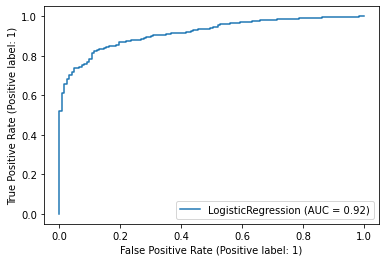

In [23]:
from sklearn import metrics 

metrics.plot_roc_curve(lr, X_test, y_test)

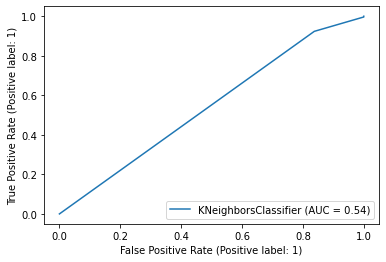

In [24]:
metrics.plot_roc_curve(knn, X_test, y_test) 

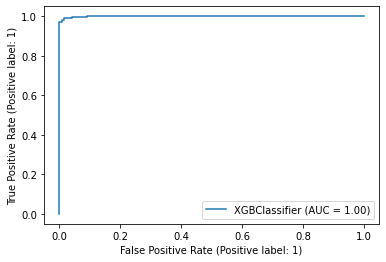

In [25]:
metrics.plot_roc_curve(xgb, X_test, y_test) 

## Exercici 3. Entrena’ls utilitzant els diferents paràmetres que admeten.

Si coneixem els diferents paràmetres que admeten els models podem utilitzar Grid Search per descobrir amb quina combinació de paràmetres obtenem una millor predicció en cada model. 

En tots els models es poden modificar una sèrie de parametres més extensa, pero en aquest exercici només se n'han modificat alguns a causa de la limitada potència computacional de què disposem.

Amb això, la millor combinació, pel que fa al ROC AUC és de la regressió (1.0) amb newton-cg com a solver, l2 com a penalty i sense class_weight.

Pel que fa a l'XGBoost el millor resultat obtingut és de 0.998229 amb gbtree com a booster, 6 com a max_depth i 50 com a scale_pos_weight.

Finalment, la millor combinació obtinguda amb el KNN la formen 7 neighbors, 'distance' com a weights i 'minkowski' com a metric.

#### Regressió logística

In [26]:
from sklearn.model_selection import GridSearchCV

losses = {}

#Creating the grid for gridsearch
param_grid = {}
param_grid['solver'] = ['newton-cg', 'lbfgs','liblinear', 'saga']
param_grid['penalty'] = ['l2', 'l1', 'elasticnet']
param_grid['class_weight'] = [None,'balanced', {0:1,1:10},{0:1,1:30}]

grid_search_lr = GridSearchCV(LogisticRegression(), param_grid, n_jobs=-1, cv=3, scoring='roc_auc', error_score=0)
grid_result_lr = grid_search_lr.fit(X, y)

# summarize results
print("Best: %f using %s" % (grid_result_lr.best_score_, grid_result_lr.best_params_))
means = grid_result_lr.cv_results_['mean_test_score']
stds = grid_result_lr.cv_results_['std_test_score']
params = grid_result_lr.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

#Update the dict    
losses['GridSearch lr' + str(grid_result_lr.best_params_)] = grid_result_lr.best_score_
losses

Best: 1.000000 using {'class_weight': None, 'penalty': 'l2', 'solver': 'newton-cg'}
1.000000 (0.000000) with: {'class_weight': None, 'penalty': 'l2', 'solver': 'newton-cg'}
0.955780 (0.006662) with: {'class_weight': None, 'penalty': 'l2', 'solver': 'lbfgs'}
1.000000 (0.000000) with: {'class_weight': None, 'penalty': 'l2', 'solver': 'liblinear'}
0.907349 (0.014788) with: {'class_weight': None, 'penalty': 'l2', 'solver': 'saga'}
0.000000 (0.000000) with: {'class_weight': None, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'class_weight': None, 'penalty': 'l1', 'solver': 'lbfgs'}
0.996626 (0.001122) with: {'class_weight': None, 'penalty': 'l1', 'solver': 'liblinear'}
0.907416 (0.014804) with: {'class_weight': None, 'penalty': 'l1', 'solver': 'saga'}
0.000000 (0.000000) with: {'class_weight': None, 'penalty': 'elasticnet', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'class_weight': None, 'penalty': 'elasticnet', 'solver': 'lbfgs'}
0.000000 (0.000000) with: {'clas

{"GridSearch lr{'class_weight': None, 'penalty': 'l2', 'solver': 'newton-cg'}": 1.0}

#### KNN

In [27]:
# Creating the grid
param_grid = {}
param_grid['n_neighbors'] = [3,5,7]
param_grid['weights'] = ['distance', 'uniform']
param_grid['metric'] = ['minkowski', 'euclidean']

grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid, n_jobs=-1, cv=3, scoring='roc_auc', error_score=0)
grid_result_knn = grid_search_knn.fit(X, y)
   
# summarize results
print("Best: %f using %s" % (grid_result_knn.best_score_, grid_result_knn.best_params_))
means = grid_result_knn.cv_results_['mean_test_score']
stds = grid_result_knn.cv_results_['std_test_score']
params = grid_result_knn.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    
losses['GridSearch knn'+ str(grid_result_knn.best_params_)] = grid_result_knn.best_score_
losses

Best: 0.566336 using {'metric': 'minkowski', 'n_neighbors': 7, 'weights': 'distance'}
0.542641 (0.003280) with: {'metric': 'minkowski', 'n_neighbors': 3, 'weights': 'distance'}
0.541630 (0.003368) with: {'metric': 'minkowski', 'n_neighbors': 3, 'weights': 'uniform'}
0.558007 (0.012502) with: {'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'distance'}
0.555774 (0.012198) with: {'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'uniform'}
0.566336 (0.013850) with: {'metric': 'minkowski', 'n_neighbors': 7, 'weights': 'distance'}
0.562425 (0.013324) with: {'metric': 'minkowski', 'n_neighbors': 7, 'weights': 'uniform'}
0.542641 (0.003280) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.541630 (0.003368) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.558007 (0.012502) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.555774 (0.012198) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.566336 

{"GridSearch lr{'class_weight': None, 'penalty': 'l2', 'solver': 'newton-cg'}": 1.0,
 "GridSearch knn{'metric': 'minkowski', 'n_neighbors': 7, 'weights': 'distance'}": 0.5663356889979276}

#### XGB

In [28]:
param_grid = {}
param_grid['booster'] = ['gbtree', 'gblinear']
param_grid['max_depth'] = [2, 4, 6, 8]
param_grid['scale_pos_weight'] = [1, 10, 50, 100]

grid_search_xgb = GridSearchCV(XGBClassifier(eval_metric='logloss'), param_grid, n_jobs=-1, cv=3, scoring='roc_auc', error_score=0)
grid_result_xgb = grid_search_xgb.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result_xgb.best_score_, grid_result_xgb.best_params_))
means = grid_result_xgb.cv_results_['mean_test_score']
stds = grid_result_xgb.cv_results_['std_test_score']
params = grid_result_xgb.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

losses['GridSearch xgb'+ str(grid_result_xgb.best_params_)] = grid_result_xgb.best_score_
losses

Best: 0.998229 using {'booster': 'gbtree', 'max_depth': 6, 'scale_pos_weight': 50}
0.995303 (0.000590) with: {'booster': 'gbtree', 'max_depth': 2, 'scale_pos_weight': 1}
0.993658 (0.000780) with: {'booster': 'gbtree', 'max_depth': 2, 'scale_pos_weight': 10}
0.991143 (0.001353) with: {'booster': 'gbtree', 'max_depth': 2, 'scale_pos_weight': 50}
0.991334 (0.000903) with: {'booster': 'gbtree', 'max_depth': 2, 'scale_pos_weight': 100}
0.997926 (0.000713) with: {'booster': 'gbtree', 'max_depth': 4, 'scale_pos_weight': 1}
0.998206 (0.000435) with: {'booster': 'gbtree', 'max_depth': 4, 'scale_pos_weight': 10}
0.997631 (0.000310) with: {'booster': 'gbtree', 'max_depth': 4, 'scale_pos_weight': 50}
0.997282 (0.000699) with: {'booster': 'gbtree', 'max_depth': 4, 'scale_pos_weight': 100}
0.997813 (0.000447) with: {'booster': 'gbtree', 'max_depth': 6, 'scale_pos_weight': 1}
0.998101 (0.000507) with: {'booster': 'gbtree', 'max_depth': 6, 'scale_pos_weight': 10}
0.998229 (0.000371) with: {'booster': 

{"GridSearch lr{'class_weight': None, 'penalty': 'l2', 'solver': 'newton-cg'}": 1.0,
 "GridSearch knn{'metric': 'minkowski', 'n_neighbors': 7, 'weights': 'distance'}": 0.5663356889979276,
 "GridSearch xgb{'booster': 'gbtree', 'max_depth': 6, 'scale_pos_weight': 50}": 0.9982293899975875}

## Exercici 4. Compara el seu rendiment utilitzant l’aproximació traint/test o cross-validation.

En l'exercici anterior, en tots els casos podem veure com tot i utilitzant els paràmetres per defecte del model ('booster': 'gbtree', 'max_depth': 6, 'scale_pos_weight': 1, en el cas de l'XGBoost, per exemple), el score de ROC AUC és lleugerament diferent al model del primer exercici. Això es deu a que en el primer cas hem fet la validació només amb el test subset i en l'exercici 3 hem utilitzat GridSearch, que inclou cross validation, és a dir, validació interna. Quan s'utilitza la cross validation el score sol ser una mica inferior al score del test subset però ens permet evitar el sobreentrenament del model.
 
ROC AUC Default params *Log Reg* Exercici 1: **0.916765**

ROC AUC Default params *Log Reg* Exercici 3: **0.955780**

ROC AUC Default params *KNN* Exercici 1: **0.542784**

ROC AUC Default params *KNN* Exercici 3: **0.541630**

ROC AUC Default params *XGB* Exercici 1: **0.999113**

ROC AUC Default params *XGB* Exercici 3: **0.997813**


In [81]:
# ROC AUC default params
for key, value in ROC_AUC_1.items():
    print(key, ' : ', format(value, '.6f'))

AUC Log. Reg.  :  0.916765
AUC KNN  :  0.542784
AUC XGB  :  0.999113


## Exercici 5. Realitza algun procés d’enginyeria de variables per millorar-ne la predicció

En el cas dels models de classificació també podem transformar les columnes objecte en columnes numèriques per poder utilitzar aquesta informació per ajudar el model a predir millor. Per fer-ho analitzem el valor que aporta cadascuna de les columnes numèriques:

- Cancellation code només té un valor, pel que no aporta valor al model i no cal incloure'l. 

- Com que UniqueCarrier només té 20 valors differents podem crear columnes dummy per convertir la columna d'objecte a integer. 

- Tailnum, Origin i Dest tenen tants valors no numèrics diferents que no els anem a utilitzar per a la predicció.

In [37]:
df_reduit.CancellationCode.nunique()

1

In [38]:
df_reduit.UniqueCarrier.nunique()

20

In [39]:
df_reduit.TailNum.nunique()

4885

#### Dummies

In [40]:
df_dum = pd.get_dummies(df_reduit['UniqueCarrier'], drop_first=True)

In [41]:
df2 = pd.concat([df_reduit,df_dum], axis=1)
df2.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Tard,AA,AQ,AS,B6,CO,DL,EV,F9,FL,HA,MQ,NW,OH,OO,UA,US,WN,XE,YV
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
636553,2008,2,12,2,2251.0,2200,2341.0,2255,WN,64,N523SW,50.0,55.0,38.0,46.0,51.0,HOU,DAL,239,2.0,10.0,0,N,0,0.0,0.0,0.0,0.0,46.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2470826,2008,5,28,3,1837.0,1755,1948.0,1915,WN,15,N780SW,71.0,80.0,62.0,33.0,42.0,BWI,MHT,377,3.0,6.0,0,N,0,0.0,0.0,0.0,0.0,33.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2352374,2008,4,19,6,2041.0,1950,2256.0,2226,CO,1835,N35204,315.0,336.0,292.0,30.0,51.0,EWR,PHX,2133,4.0,19.0,0,N,0,8.0,0.0,0.0,0.0,22.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2467909,2008,5,27,2,2232.0,2055,2350.0,2215,WN,3496,N735SA,78.0,80.0,69.0,95.0,97.0,HOU,MAF,441,3.0,6.0,0,N,0,6.0,0.0,0.0,0.0,89.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4277277,2008,8,16,6,1552.0,1530,1722.0,1705,WN,828,N600WN,90.0,95.0,76.0,17.0,22.0,ABQ,SLC,493,6.0,8.0,0,N,0,4.0,0.0,0.0,0.0,13.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


#### Split

In [66]:
X_plus = df2[df2.columns[~df2.columns.isin(['CancellationCode','UniqueCarrier','TailNum','Origin','Dest','ArrDelay'])]]

y_plus = df2['Tard']

X_train_plus, X_test_plus, y_train_plus, y_test_plus = train_test_split(X_plus, y_plus, random_state=0, test_size=0.2) 

### Model 1 Regressió logística

In [68]:
lr_plus = LogisticRegression()
lr_plus.fit(X_train_plus, y_train_plus)

y_hat_lr_plus = lr_plus.predict(X_test_plus)

### Model 2 KNN

In [69]:
knn_plus = KNeighborsClassifier(n_neighbors=3)
knn_plus.fit(X_train_plus, y_train_plus)

y_hat_knn_plus = knn_plus.predict(X_test_plus)

### Model 3 XGBoost

In [70]:
xgb_plus = XGBClassifier()
xgb_plus.fit(X_train_plus, y_train_plus)

y_hat_xgb_plus = xgb_plus.predict(X_test_plus)

[18:47:36] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


### Mètriques

In [82]:
ROC_AUC_2 = {}
ROC_AUC_2['AUC Log. Reg.'] = roc_auc_score(y_test_plus, lr_plus.predict_proba(X_test_plus)[:, 1])
ROC_AUC_2['AUC KNN'] = roc_auc_score(y_test_plus, knn_plus.predict_proba(X_test_plus)[:, 1])
ROC_AUC_2['AUC XGB'] = roc_auc_score(y_test_plus, xgb_plus.predict_proba(X_test_plus)[:, 1])

# ROC AUC default params
for key, value in ROC_AUC_2.items():
    print(key, ' : ', format(value, '.6f'))

AUC Log. Reg.  :  0.967694
AUC KNN  :  0.532513
AUC XGB  :  1.000000


#### Amb aquestes dades i les dels exercics anteriors podem veure si realmente hem millorat la predició afegint la columna UniqueCarrier

Tot i que incloure més variables en un model no sempre significa que el model pugui predir millor, en el cas de la regressió logística i de l'XGBoost, la predicció ha millorat una mica, ja que el ROC AUC score de partida ja era prou elevant en els dos casos. En el cas del KNN, en canvi, no ha millorat, sino que ha empitjorat lleugerament.

In [83]:
# ROC AUC default params
for key, value in ROC_AUC_1.items():
    print(key, ' : ', format(value, '.6f'))

AUC Log. Reg.  :  0.916765
AUC KNN  :  0.542784
AUC XGB  :  0.999113


In [84]:
# ROC AUC default params
for key, value in ROC_AUC_2.items():
    print(key, ' : ', format(value, '.6f'))

AUC Log. Reg.  :  0.967694
AUC KNN  :  0.532513
AUC XGB  :  1.000000


## Exercici 6. No utilitzis la variable DepDelay a l’hora de fer prediccions

Tot i que la correlació entre DepDelay i Tard, la nostra variable target, no és gens alta (0.11), com sí que hi ha correlació elevada (0.95) entre DepDelay i ArrDelay (la variable en la que es bassa Tard), és probable que els models es basin en DepDelay per fer la predicció de Tard. Si eliminem DepDelay del model és possible que el ROC AUC dels models canviï: 

- El ROC AUC dels models de regressió logística i XGBoost han augmentat lleugerament (de 0.92 a 0.95 en el primer cas i de 0.999 a 1.0 en el segon). En el cas del KNN, ha disminuït de 0.54 a 0.53. Per tant, com ja hem mencionat anteriorment, un model amb més variables no sempre prediu millor, ja que també augmenta el soroll del model. A vegades, com més simple és un model, millor és la seva predicció.


In [86]:
# Correlació entre DepDelay i ArrDelay
df_reduit.corr()['DepDelay']['ArrDelay']

0.9503277697576276

In [87]:
# Correlació entre DepDelay i Tard
df_reduit.corr()['DepDelay']['Tard']

0.11294060261367381

#### Split

In [73]:
X_3 = df2[df2.columns[~df2.columns.isin(['CancellationCode','UniqueCarrier','TailNum','Origin','Dest','ArrDelay','DepDelay'])]]

y_3 = df2['Tard']

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, random_state=0, test_size=0.2) 

#### Model 1 Regressió logística

In [93]:
lr_3 = LogisticRegression()
lr_3.fit(X_train_3, y_train_3)

y_hat_lr_3 = lr_3.predict(X_test_3)

accuracy_2 = {}
accuracy_2['Acc. Logistic Reg.'] = accuracy_score(y_test_3, y_hat_lr_3)

ROC_AUC_3 = {}
ROC_AUC_3['ROC AUC Logistic Reg.'] = roc_auc_score(y_test_3, lr_3.predict_proba(X_test_3)[:, 1])

#### Model 2 KNN

In [94]:
knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_3.fit(X_train_3, y_train_3)

y_hat_knn_3 = knn_3.predict(X_test_3)

accuracy_2['Acc. KNN'] = accuracy_score(y_test_3, y_hat_knn_3)
ROC_AUC_3['ROC AUC KNN'] = roc_auc_score(y_test_3, knn_3.predict_proba(X_test_3)[:, 1])

#### Model 3 XGBoost

In [95]:
xgb_3 = XGBClassifier()
xgb_3.fit(X_train_3, y_train_3)

y_hat_xgb_3 = xgb_3.predict(X_test_3)

accuracy_2['Acc. XGB'] = accuracy_score(y_test_3, y_hat_xgb_3)
ROC_AUC_3['ROC AUC XGB'] = roc_auc_score(y_test_3, xgb_3.predict_proba(X_test_3)[:, 1])

[19:45:39] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


#### Mètriques

In [96]:
# ROC AUC primer vs tercer model
display('ROC AUC amb DepDelay: ',ROC_AUC_1)
display('ROC AUC sense DepDelay: ',ROC_AUC_3)

'ROC AUC amb DepDelay: '

{'AUC Log. Reg.': 0.9167648056180582,
 'AUC KNN': 0.5427835714560145,
 'AUC XGB': 0.9991129909244438}

'ROC AUC sense DepDelay: '

{'ROC AUC Logistic Reg.': 0.9538529026120937,
 'ROC AUC KNN': 0.5314460355820649,
 'ROC AUC XGB': 1.0}